## [코로나19](http://www.seoul.go.kr/coronaV/coronaStatus.do)
* 서울시에서 공개한 코로나19 발생동향 분석

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("covid-19-seoul.csv")
df.shape

(347, 8)

In [3]:
df = df.sort_values(["연번"], ascending=False)

In [4]:
df.head()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
0,347,9127,3.24.,여('98),은평구,-,#8079 접촉,서울의료원
1,346,9074,3.24.,남('63),파주,"필리핀, 마닐라",해외접촉 추정,세브란스병원
2,345,9099,3.24.,남('60),서초구,"브라질, 아르헨티아, 칠레, 볼리비아",해외접촉 추정,서남병원
3,344,9115,3.24.,남('59),강남구,-,#8646 접촉,서울성모병원
4,343,9079,3.24.,남('90),용산구,필리핀,해외접촉 추정,서남병원


In [5]:
df.tail()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
342,5,9,1.31.,여(‵92),성북구,-,#5 접촉,서울의료원(퇴원)
343,4,7,1.30.,남(‵91),마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
344,3,6,1.30.,남(‵64),종로구,-,#3 접촉,서울대학교병원(퇴원)
345,2,5,1.30.,남(‵87),중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
346,1,2,1.23.,남(‵64),강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


## 시각화 도구 불러오기

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(font="Malgun Gothic")
sns.set(font="AppleGothic")
plt.rc("axes", unicode_minus=False)

### 시각화 선명하게 설정하기

In [7]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## 거주지별 확진자

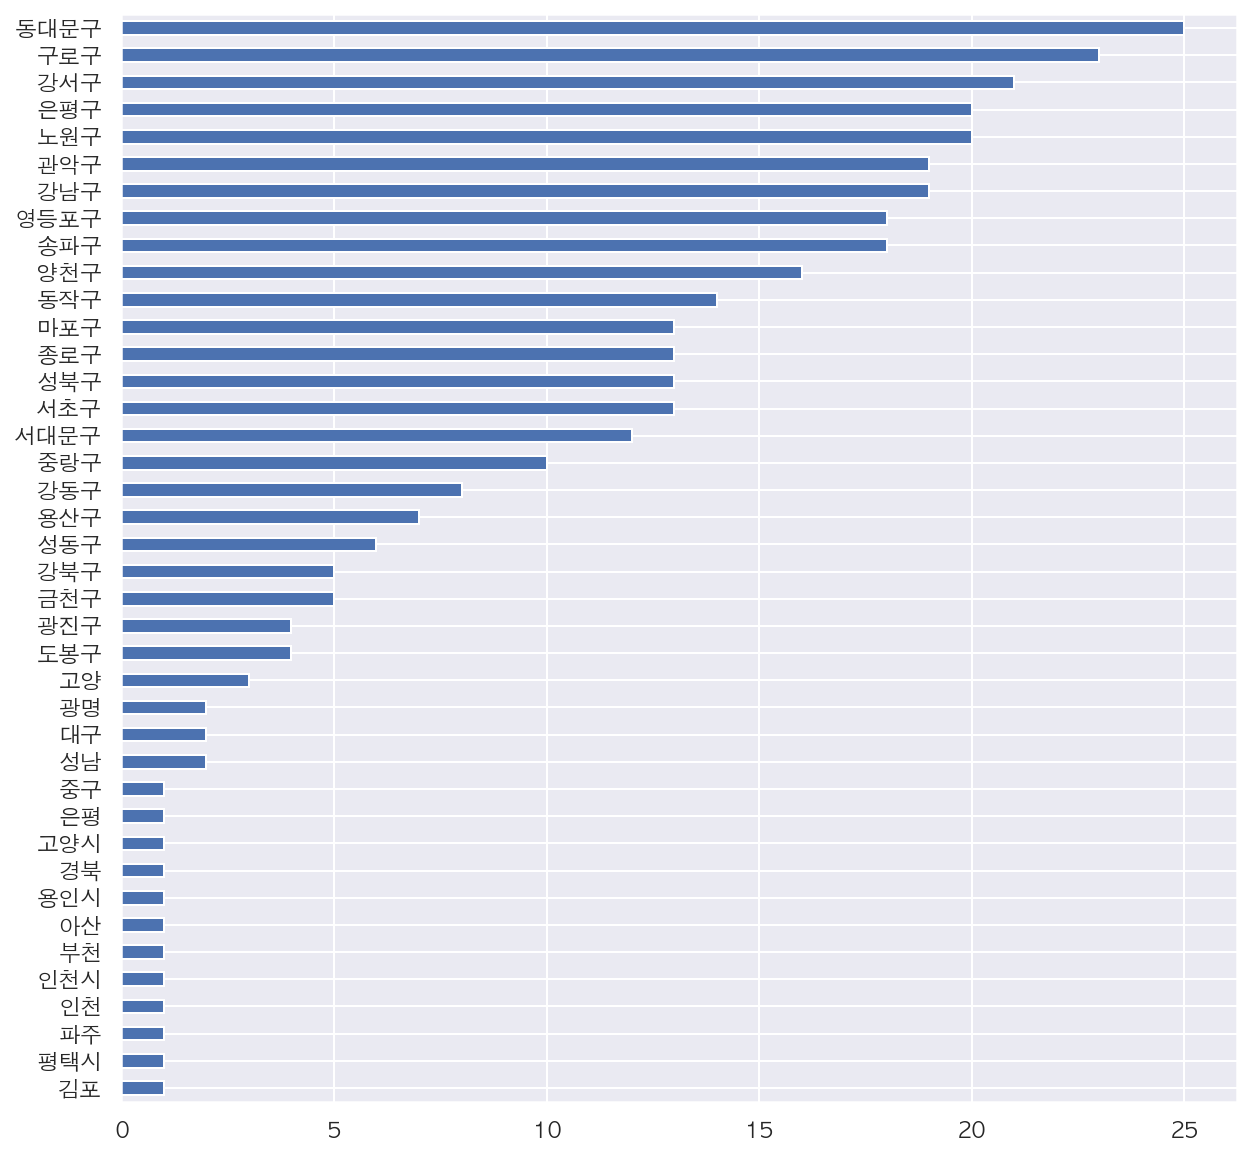

In [8]:
gu_count = df["거주지"].value_counts().sort_values()
gu_count.plot.barh(figsize=(10, 10))

In [9]:
import json

file_path = 'seoul_municipalities_geo_simple.json'
geo_json = json.load(open(file_path, encoding="utf-8"))
geo_json["features"][0]['properties']["name"]

'강동구'

In [10]:
gu = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
gu[:5]

['강남구', '강동구', '강북구', '강서구', '관악구']

In [11]:
df_gu = gu_count.reset_index()
df_gu.columns = ["구", "환자수"]
df_gu.head()

,구,환자수
0,김포,1
1,평택시,1
2,파주,1
3,인천,1
4,인천시,1


In [12]:
df_gu["구"] = df_gu["구"].replace("은평", "은평구")
df_gu["지역"] = df_gu["구"].map(lambda x : x if x in gu else "타지역")
df_gu[["구", "지역"]].head()

,구,지역
0,김포,타지역
1,평택시,타지역
2,파주,타지역
3,인천,타지역
4,인천시,타지역


In [13]:
df_gu_etc = df_gu.groupby("지역")["환자수"].sum().sort_values()
df_gu_etc.head()

지역
중구     1
광진구    4
도봉구    4
강북구    5
금천구    5
Name: 환자수, dtype: int64

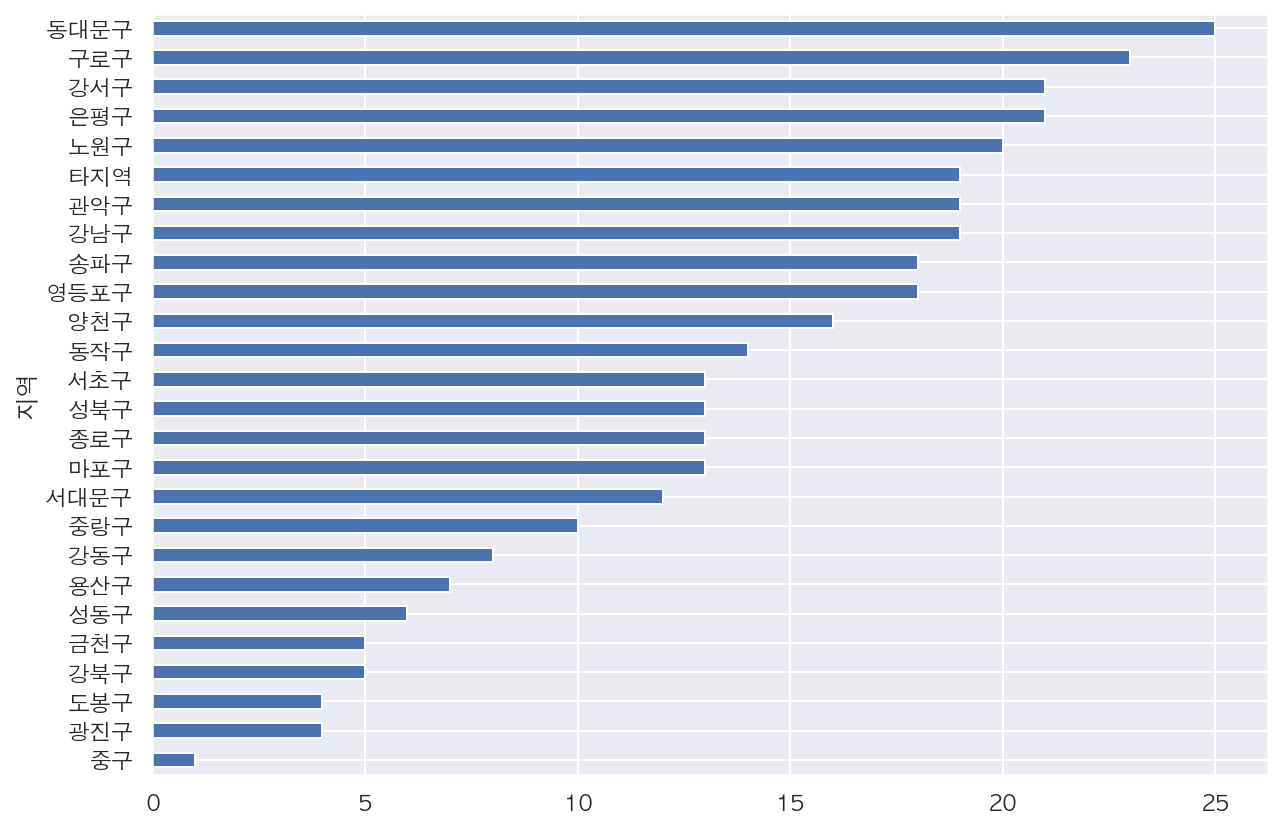

In [14]:
df_gu_etc.plot.barh(figsize=(10, 7))

In [15]:
import folium

m = folium.Map([37.562, 126.988], zoom_start=11, tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=gu_count,
    columns=['구', '환자수'],
    key_on='feature.properties.name',
    fill_color='Oranges',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='환자수'
).add_to(m)

m

## 조치사항

In [16]:
df["조치사항"].value_counts()

서울의료원          96
서남병원           73
보라매병원          39
서울의료원(퇴원)      21
국립중앙의료원(퇴원)    12
국립중앙의료원        12
생활치료센터         11
서울대학교병원(퇴원)    10
서북병원           10
서남병원(퇴원)        7
보라매병원(퇴원)       5
서울성모병원          4
중앙대학교병원(퇴원)     4
타시도이관(퇴원)       3
타시도이관           3
서북병원(퇴원)        3
타시도 이관          3
중앙대학교병원         3
삼육서울병원          3
순천향서울병원         3
한일병원            2
확인중             2
상계백병원           2
한일병원(퇴원)        2
한양대학교병원(퇴원)     2
상계백병원(퇴원)       2
상계병원            1
서울대학교병원         1
세브란스병원          1
서울아산병원          1
고대구로병원          1
강남세브란스병원        1
고대안암병원          1
서울백병원           1
고대구로병원(퇴원)      1
국립중앙의료병원        1
Name: 조치사항, dtype: int64

In [17]:
df["확진일"].value_counts()

3.10.     46
3.9.      26
3.20.     17
3.11.     17
3.19.     17
2.25.     15
3.16.     13
3.24.     13
2.27.     12
3.12.     12
3.18.     11
2.26.     10
3.8.      10
3.13.      9
3.14.      8
3.21.      8
2.28.      8
3.7.       7
3.6.       7
3.2.       6
3.15.      6
3.1.       6
3.22.      6
3.4.       5
2.29.      5
2.20.      5
2.23.      4
2.22.      4
3.17.      4
3.23.      4
2.24.      3
1.30.      3
1.31.      3
2.5.       2
2.19.      2
2.21.      2
2.16.      2
3.5.       1
2.24..     1
2.2.       1
1.23.      1
2.7.       1
2.6.       1
2.25       1
2.27       1
3.3.       1
Name: 확진일, dtype: int64

In [18]:
df["확진일자"] = pd.to_datetime("2020"+ "-" + df["확진일"].str.replace(".", "-"))
df["확진일자"].head()

0   2020-03-24
1   2020-03-24
2   2020-03-24
3   2020-03-24
4   2020-03-24
Name: 확진일자, dtype: datetime64[ns]

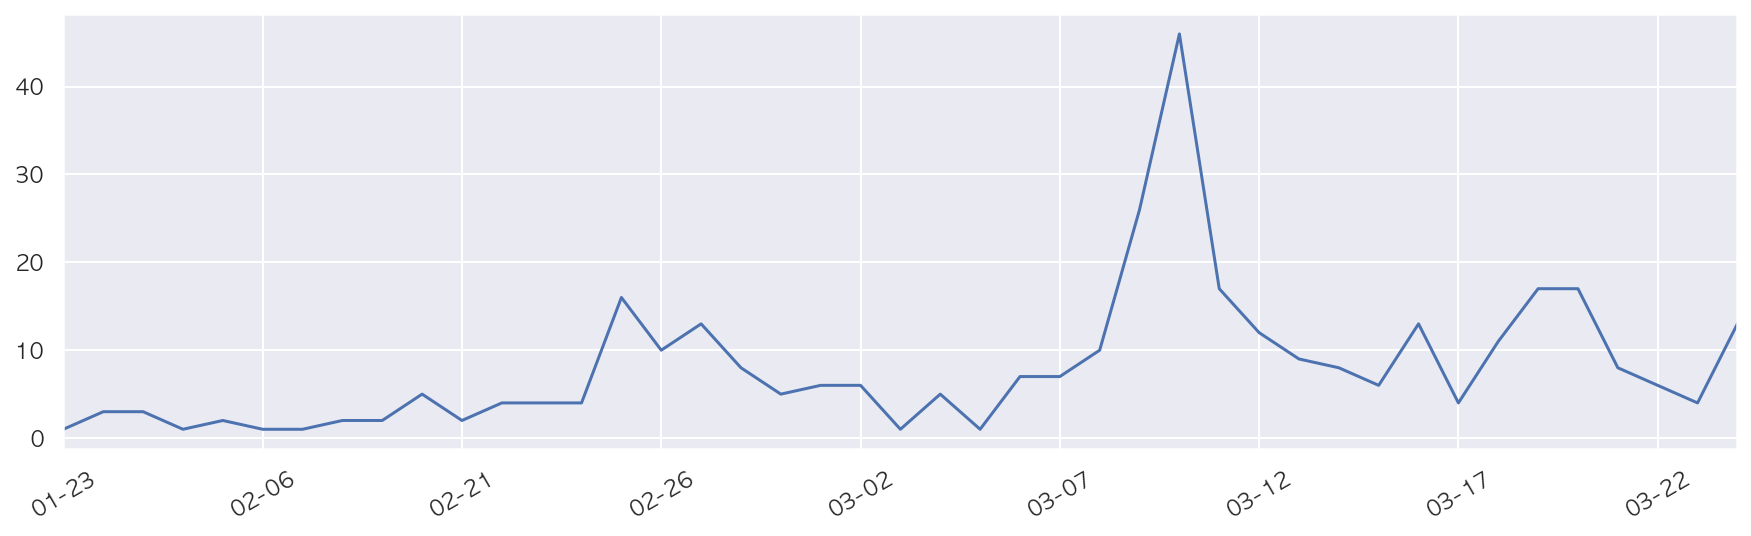

In [19]:
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df["월일"].value_counts().sort_index().plot(figsize=(15, 4), rot=30)

In [20]:
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[0]

1

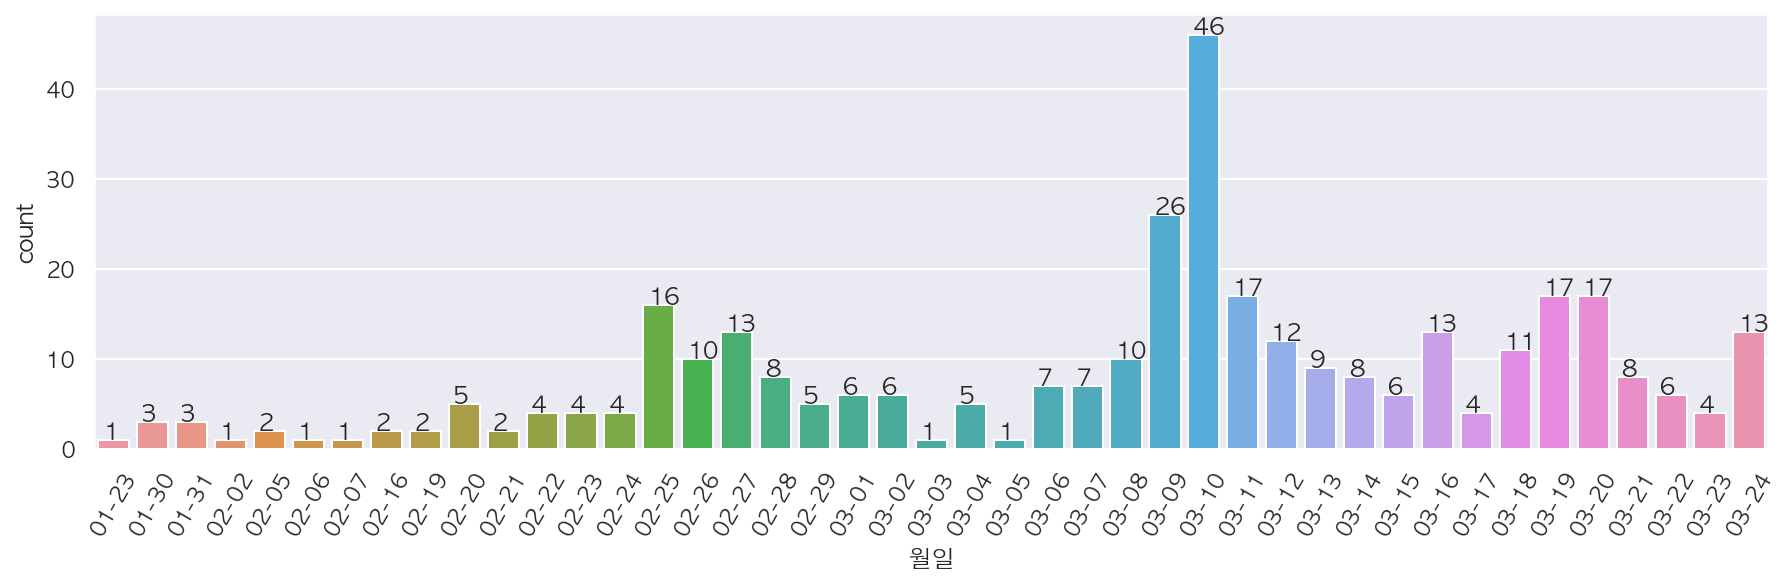

In [21]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
g = sns.countplot(data=df.sort_values(by="월일"), x="월일")

for i in range(len(day_count)):
    g.text(x=i-0.3, y=day_count.iloc[i], s=day_count.iloc[i])

## 누적확진

In [22]:
cum = df.groupby(["확진일자"])["연번"].count()
cum

확진일자
2020-01-23     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
2020-02-06     1
2020-02-07     1
2020-02-16     2
2020-02-19     2
2020-02-20     5
2020-02-21     2
2020-02-22     4
2020-02-23     4
2020-02-24     4
2020-02-25    16
2020-02-26    10
2020-02-27    13
2020-02-28     8
2020-02-29     5
2020-03-01     6
2020-03-02     6
2020-03-03     1
2020-03-04     5
2020-03-05     1
2020-03-06     7
2020-03-07     7
2020-03-08    10
2020-03-09    26
2020-03-10    46
2020-03-11    17
2020-03-12    12
2020-03-13     9
2020-03-14     8
2020-03-15     6
2020-03-16    13
2020-03-17     4
2020-03-18    11
2020-03-19    17
2020-03-20    17
2020-03-21     8
2020-03-22     6
2020-03-23     4
2020-03-24    13
Name: 연번, dtype: int64

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [23]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1]["확진일자"]
last_day = df.iloc[0]["확진일자"]
first_day, last_day

(Timestamp('2020-01-23 00:00:00'), Timestamp('2020-03-24 00:00:00'))

In [24]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
               '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
      

In [25]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
days = pd.DataFrame({"확진일자": days})
days.head()

,확진일자
0,2020-01-23
1,2020-01-24
2,2020-01-25
3,2020-01-26
4,2020-01-27


In [26]:
all_day = days.merge(cum, left_on="확진일자", right_on=cum.index, how="left")
all_day = all_day.rename(columns={"연번":"확진수"})
all_day.head()

,확진일자,확진수
0,2020-01-23,1.0
1,2020-01-24,NaN
2,2020-01-25,NaN
3,2020-01-26,NaN
4,2020-01-27,NaN


## 누적 확진자 수 구하기

In [27]:
all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-23,1.0,1.0
1,2020-01-24,NaN,1.0
2,2020-01-25,NaN,1.0
3,2020-01-26,NaN,1.0
4,2020-01-27,NaN,1.0
...,...,...,...
57,2020-03-20,17.0,316.0
58,2020-03-21,8.0,324.0
59,2020-03-22,6.0,330.0
60,2020-03-23,4.0,334.0


In [28]:
all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x: x[-5:])
all_day["일자"].head()

0    01-23
1    01-24
2    01-25
3    01-26
4    01-27
Name: 일자, dtype: object

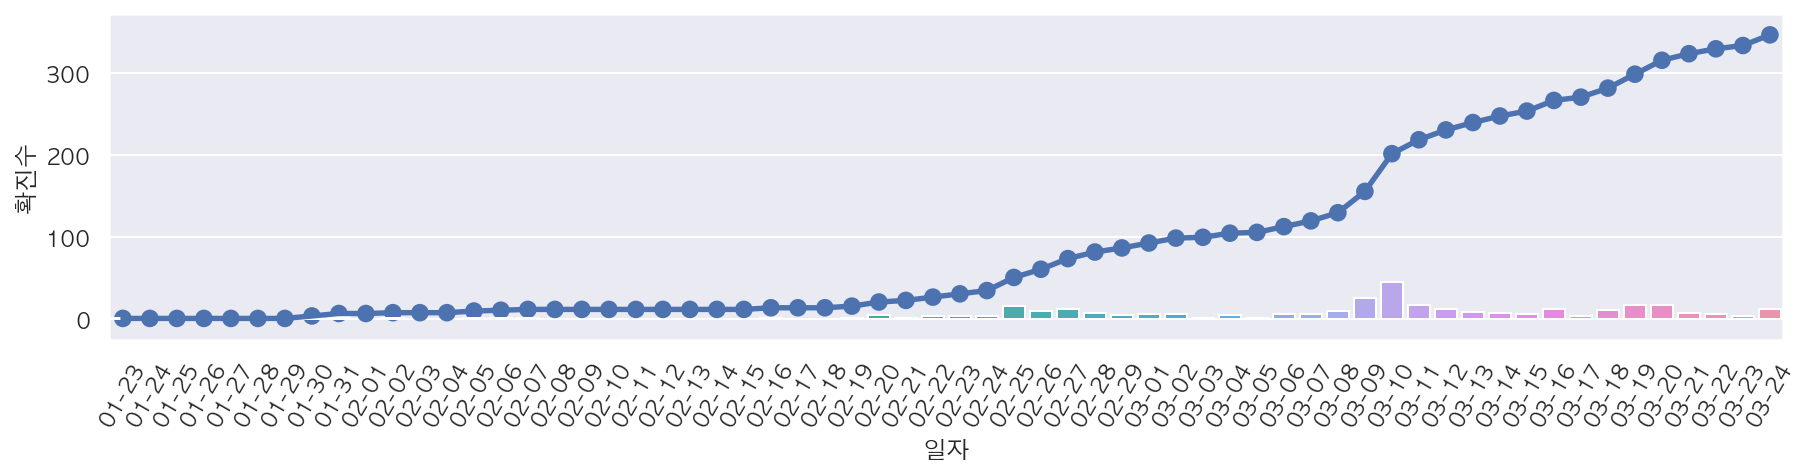

In [29]:
plt.figure(figsize=(15, 3))
plt.xticks(rotation=60)
sns.pointplot(data=all_day, x="일자", y="누적확진")
sns.barplot(data=all_day, x="일자", y="확진수")

In [30]:
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-23,1.0,1.0,01-23,1,3
1,2020-01-24,NaN,1.0,01-24,1,4
2,2020-01-25,NaN,1.0,01-25,1,5
3,2020-01-26,NaN,1.0,01-26,1,6
4,2020-01-27,NaN,1.0,01-27,1,0


## 요일별 확진 수 

In [31]:
all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum().unstack()
all_day_week.style.background_gradient(cmap='PuBu')

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,4,3,0,0
2,4,16,14,19,11,9,7
3,49,64,33,30,33,23,28


## 접촉력

In [32]:
df["접촉력"].value_counts()

구로구 콜센터 관련    60
해외접촉 추정       42
확인중           32
콜센터직원 접촉      32
타시도 확진자 접촉    22
              ..
#8646 접촉       1
#83 접촉         1
구로구 콜센터 접촉     1
#5 접촉          1
#8063 접촉       1
Name: 접촉력, Length: 72, dtype: int64

In [33]:
df["접촉경로"] = df["접촉력"]
df.loc[df["접촉력"].str.contains("접촉자"), "접촉경로"] = "접촉자"
df.loc[df["접촉력"].str.contains("은평성모"), "접촉경로"] = "은평성모병원"
df.loc[df["접촉력"].str.contains("가족"), "접촉경로"] = "가족"
df.loc[df["접촉력"].str.contains("부동산"), "접촉경로"] = "부동산중개법인"
df.loc[df["접촉력"].str.contains("확잍중"), "접촉경로"] = "확인중"

In [34]:
df["접촉경로"].value_counts()

구로구 콜센터 관련           60
해외접촉 추정              42
확인중                  33
콜센터직원 접촉             32
타시도 확진자 접촉           22
동대문구 관련(교회,PC방)      16
해외 접촉                15
은평성모병원               14
성동구 주상복합 관리사무소 관련    13
접촉자                  10
동대문구 관련(요양보호사)        8
해외접촉                  7
대구 방문                 5
-                     4
동대문구 관련(교회, PC방)      4
대구 확진자 접촉             3
#780 접촉               3
#6 접촉                 3
#8486 접촉              3
부동산중개법인               3
#7923 접촉              2
신천지 추정                2
#8791 접촉              2
#8271 접촉              2
명성교회 관련               2
콜센터직원 접촉              2
#8245 접촉              2
대구 방문(명성교회)           1
#9020 접촉              1
#8717 접촉              1
쇼핑몰 관련                1
대구 거주                 1
서울재생병원 관련             1
#8709 접촉 추정           1
해외 접촉(추정)             1
#8196 접촉              1
#3 접촉                 1
#30 접촉                1
여의도 건설현장 관련           1
#7280 접촉(추정)          1
#6727 첩촉              1
#5 접촉           

## 가장 많은 전파가 일어난 번호

In [35]:
import re

re.sub("[^0-9]", "", "#7265 접촉(추정)")

'7265'

In [36]:
def get_number(text):
    return re.sub("[^0-9]", "", text)
    
get_number("#7265 접촉(추정)")

'7265'

In [37]:
df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
# contact = contact.drop(0)
contact.columns = ["환자번호", "전파수"]
contact.head()

,환자번호,전파수
0,,298
1,6,4
2,780,3
3,8486,3
4,8791,2


In [38]:
top_contact = contact.merge(df, left_on="환자번호", right_on="환자")
top_contact.head()

,환자번호,전파수,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항,확진일자,월일,접촉경로,접촉번호
0,6,4,3,6,1.30.,남(‵64),종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,01-30,#3 접촉,3
1,780,3,31,780,2.22.,남('65),송파구,,대구 방문,중앙대학교병원(퇴원),2020-02-22,02-22,대구 방문,
2,8791,2,305,8791,3.20.,남('97),중랑구,필리핀,해외접촉 추정,국립중앙의료원,2020-03-20,03-20,해외접촉 추정,
3,8271,2,266,8271,3.16.,남('94),영등포구,"모로코, 프랑스, 오스트리아",해외접촉 추정,서울의료원,2020-03-16,03-16,해외접촉 추정,
4,794,2,33,794,2.24.,여('70),송파구,-,#780 접촉,서울의료원(퇴원),2020-02-24,02-24,#780 접촉,780


In [39]:
top_contactor = top_contact.iloc[0, 0]
top_contactor

'6'

In [40]:
df[df["접촉경로"].str.contains(top_contactor)]

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항,확진일자,월일,접촉경로,접촉번호
3,344,9115,3.24.,남('59),강남구,-,#8646 접촉,서울성모병원,2020-03-24,03-24,#8646 접촉,8646
37,310,8792,3.20.,여('60),성북구,-,#8063 접촉,서울의료원,2020-03-20,03-20,#8063 접촉,8063
40,307,8713,3.20.,남('60),노원구,-,#8486 접촉,서울의료원,2020-03-20,03-20,#8486 접촉,8486
59,288,8601,3.19.,여('61),노원구,-,#8486 접촉,서울의료원,2020-03-19,03-19,#8486 접촉,8486
63,284,8617,3.19.,여('34),용산구,-,#8486 접촉,중앙대학교병원,2020-03-19,03-19,#8486 접촉,8486
84,263,8268,3.16.,남('01),구로구,-,#8196 접촉,서울의료원,2020-03-16,03-16,#8196 접촉,8196
156,191,7647,3.10.,여('90),은평구,"프랑스, 스페인",#6959 접촉(추정),서울의료원,2020-03-10,03-10,#6959 접촉(추정),6959
220,127,7280,3.8.,남('69),강남구,-,#6727 첩촉,보라매병원,2020-03-08,03-08,#6727 첩촉,6727
328,19,112,2.20.,여(‵41),종로구,-,#136 접촉,서울대학교병원(퇴원),2020-02-20,02-20,#136 접촉,136
330,17,83,2.20.,남(‵44),종로구,-,#6 접촉(추정),국립중앙의료원(퇴원),2020-02-20,02-20,#6 접촉(추정),6


In [41]:
pd.options.display.max_rows = 100

In [42]:
df_call = df[df["접촉경로"].str.contains("콜센터")]
print(df_call.shape)
df_call["접촉경로"].value_counts()

(95, 12)


구로구 콜센터 관련    60
콜센터직원 접촉      32
콜센터직원 접촉       2
구로구 콜센터 접촉     1
Name: 접촉경로, dtype: int64

## 조치사항

In [43]:
df["조치사항"].value_counts()

서울의료원          96
서남병원           73
보라매병원          39
서울의료원(퇴원)      21
국립중앙의료원(퇴원)    12
국립중앙의료원        12
생활치료센터         11
서울대학교병원(퇴원)    10
서북병원           10
서남병원(퇴원)        7
보라매병원(퇴원)       5
서울성모병원          4
중앙대학교병원(퇴원)     4
타시도이관(퇴원)       3
타시도이관           3
서북병원(퇴원)        3
타시도 이관          3
중앙대학교병원         3
삼육서울병원          3
순천향서울병원         3
한일병원            2
확인중             2
상계백병원           2
한일병원(퇴원)        2
한양대학교병원(퇴원)     2
상계백병원(퇴원)       2
상계병원            1
서울대학교병원         1
세브란스병원          1
서울아산병원          1
고대구로병원          1
강남세브란스병원        1
고대안암병원          1
서울백병원           1
고대구로병원(퇴원)      1
국립중앙의료병원        1
Name: 조치사항, dtype: int64

In [44]:
df["퇴원"] = df["조치사항"].str.contains("퇴원")
df["병원"] = df["조치사항"].str.replace("\(퇴원\)", "")

In [45]:
df["퇴원"].value_counts()

False    275
True      72
Name: 퇴원, dtype: int64

In [46]:
df["퇴원"].value_counts(normalize=True)

False    0.792507
True     0.207493
Name: 퇴원, dtype: float64

In [47]:
df["병원"].value_counts()

서울의료원       117
서남병원         80
보라매병원        44
국립중앙의료원      24
서북병원         13
생활치료센터       11
서울대학교병원      11
중앙대학교병원       7
타시도이관         6
상계백병원         4
한일병원          4
서울성모병원        4
삼육서울병원        3
순천향서울병원       3
타시도 이관        3
확인중           2
고대구로병원        2
한양대학교병원       2
서울백병원         1
강남세브란스병원      1
서울아산병원        1
상계병원          1
국립중앙의료병원      1
세브란스병원        1
고대안암병원        1
Name: 병원, dtype: int64

## 성별

In [48]:
df["성별"] = df["성별(출생년)"].map(lambda x : x.split("(")[0])

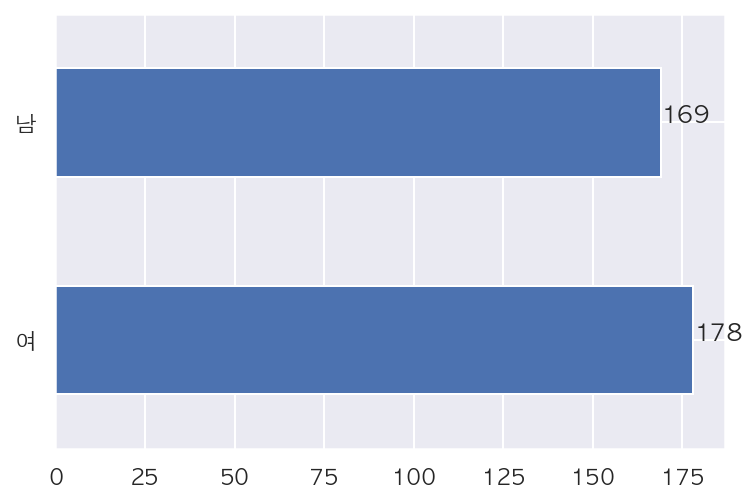

In [49]:
gender_count = df["성별"].value_counts()
g = gender_count.plot.barh()
for i, val in enumerate(gender_count):
    g.text(x=val, y=i, s=val)

## 연령

In [50]:
# df["출생년"] = df["성별(출생년)"].map(lambda x : 
#                   x.split("(")[-1].replace("'", "").replace("‵", "").replace(")", "").strip())

df["출생년"] = df["성별(출생년)"].map(get_number)

df.loc[df["출생년"].astype(int) > 20, "출생년"] = "19" + df["출생년"]
df.loc[df["출생년"].astype(int) <= 20, "출생년"] = "20" + df["출생년"]

In [51]:
df["출생년"].value_counts().head()

1969    14
1982    13
1991    12
1994    12
1992    11
Name: 출생년, dtype: int64

In [52]:
df["출생년"] = df["출생년"].astype(int)
df["나이"] = 2020 - df["출생년"]

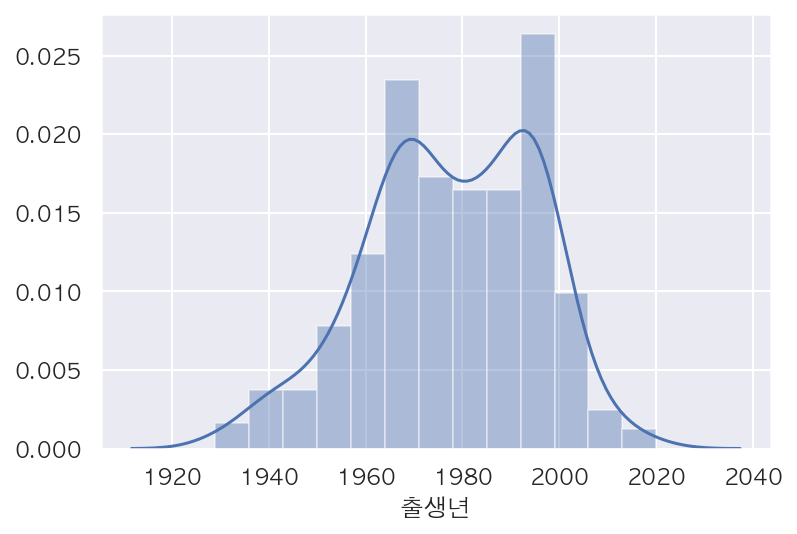

In [53]:
sns.distplot(df["출생년"])

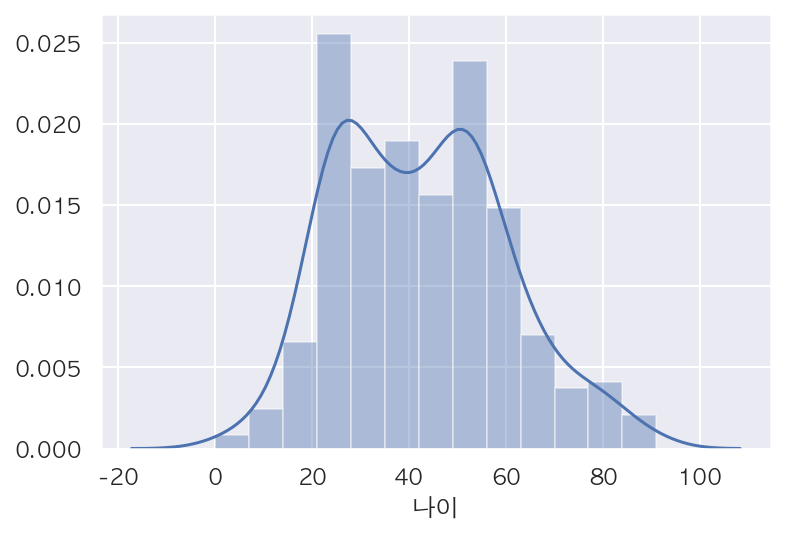

In [54]:
sns.distplot(df["나이"])

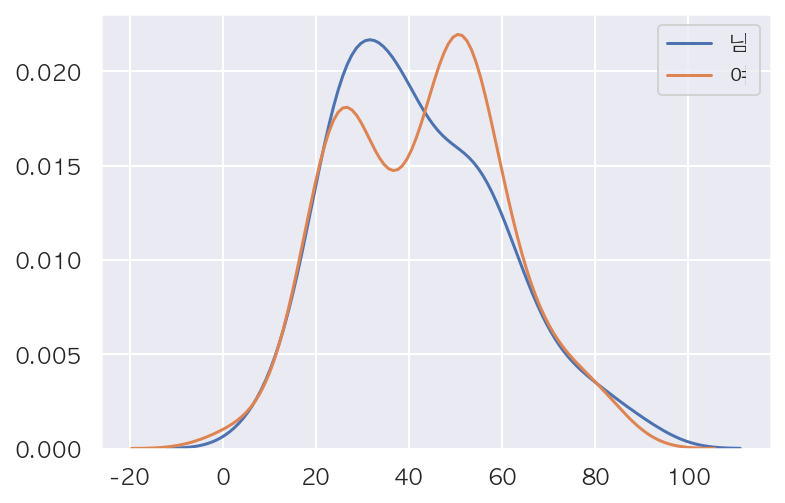

In [55]:
male_age = df.loc[df["성별"] == "남", "나이"]
female_age = df.loc[df["성별"] == "여", "나이"]
sns.kdeplot(male_age, label="남")
sns.kdeplot(female_age, label="여")

## 퇴원여부

In [56]:
df["퇴원"].value_counts()

False    275
True      72
Name: 퇴원, dtype: int64

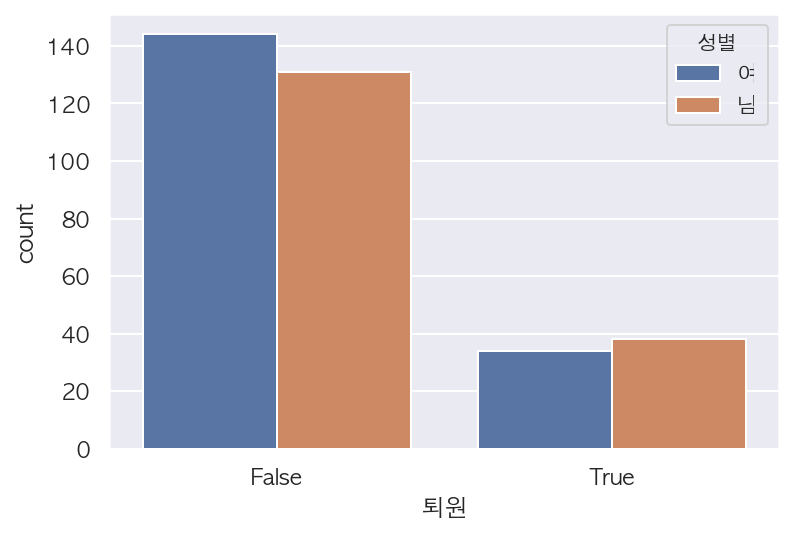

In [57]:
sns.countplot(data=df, x="퇴원", hue="성별")

## 여행력

In [58]:
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"] = df["해외"].replace("", np.nan)
df["해외"].value_counts()

미국                           13
필리핀                           9
영국                            5
스페인                           4
중국 우한시                        4
필리핀, 마닐라                      2
프랑스, 독일                       2
프랑스                           2
이탈리아, 프랑스                     2
이탈리아                          2
싱가포르                          1
폴란드                           1
스페인, 카타르                      1
우한 교민                         1
브라질, 아르헨티아, 칠레, 볼리비아          1
체코, 헝가리, 오스트리아, 이탈리아, 프랑스     1
미국, 캐나다                       1
스페인,체코                        1
모로코, 프랑스, 오스트리아               1
태국                            1
일본                            1
캐나다                           1
독일,프랑스                        1
베트남                           1
독일                            1
중국 청도                         1
프랑스, 스페인                      1
우한교민                          1
스페인, 프랑스                      1
영국, 프랑스                       1
이탈리아, 독일, 홍콩                  1
Name: 해외

In [59]:
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(66, 18)

In [60]:
df_oversea["해외"] = df_oversea["해외"].replace("우한교민", "우한 교민")
df_oversea["해외"].value_counts()

미국                           13
필리핀                           9
영국                            5
스페인                           4
중국 우한시                        4
필리핀, 마닐라                      2
프랑스, 독일                       2
이탈리아                          2
프랑스                           2
이탈리아, 프랑스                     2
우한 교민                         2
싱가포르                          1
폴란드                           1
스페인, 카타르                      1
미국, 캐나다                       1
체코, 헝가리, 오스트리아, 이탈리아, 프랑스     1
스페인, 프랑스                      1
모로코, 프랑스, 오스트리아               1
브라질, 아르헨티아, 칠레, 볼리비아          1
태국                            1
스페인,체코                        1
일본                            1
캐나다                           1
독일,프랑스                        1
베트남                           1
독일                            1
중국 청도                         1
프랑스, 스페인                      1
영국, 프랑스                       1
이탈리아, 독일, 홍콩                  1
Name: 해외, dtype: int64

In [61]:
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드"
europe = europe.replace(", ", "|")
europe

'체코|헝가리|오스트리아|이탈리아|프랑스|모로코|독일|스페인|영국|폴란드'

In [62]:
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea["해외"].value_counts()

유럽                      28
미국                      13
필리핀                      9
중국 우한시                   4
필리핀, 마닐라                 2
우한 교민                    2
베트남                      1
브라질, 아르헨티아, 칠레, 볼리비아     1
미국, 캐나다                  1
일본                       1
싱가포르                     1
태국                       1
중국 청도                    1
캐나다                      1
Name: 해외, dtype: int64

In [64]:
day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count().groupby(level=[1]).cumsum()
day_oversea.head()

확진일자        해외    
2020-01-23  중국 우한시    1
2020-01-30  중국 우한시    3
2020-02-02  우한 교민     1
2020-02-05  싱가포르      1
2020-02-06  중국 우한시    4
Name: 연번, dtype: int64

In [65]:
day_oversea = day_oversea.reset_index()
day_oversea = day_oversea.rename(columns={'연번':'확진자수'})
print(day_oversea.shape)
day_oversea.head()

(44, 3)


,확진일자,해외,확진자수
0,2020-01-23,중국 우한시,1
1,2020-01-30,중국 우한시,3
2,2020-02-02,우한 교민,1
3,2020-02-05,싱가포르,1
4,2020-02-06,중국 우한시,4


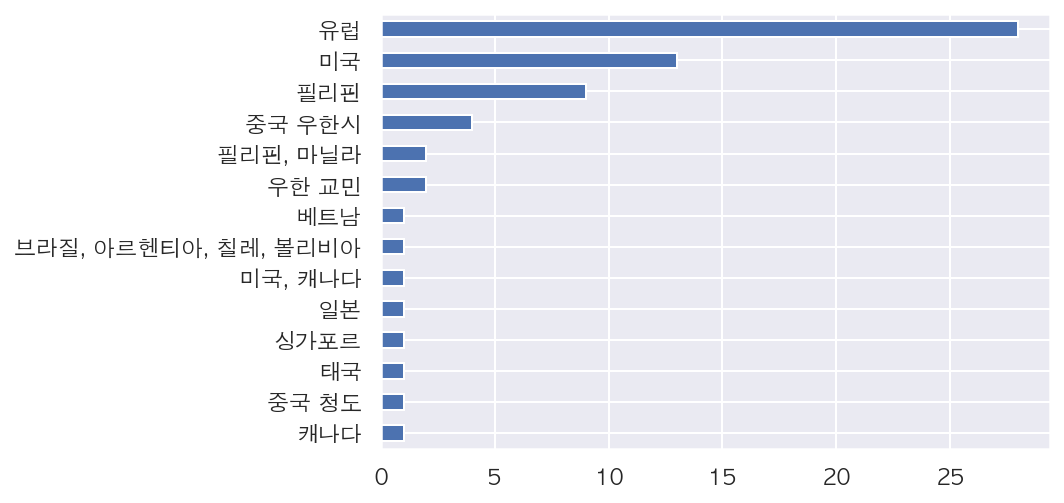

In [66]:
df_oversea["해외"].value_counts(ascending=True).plot.barh()

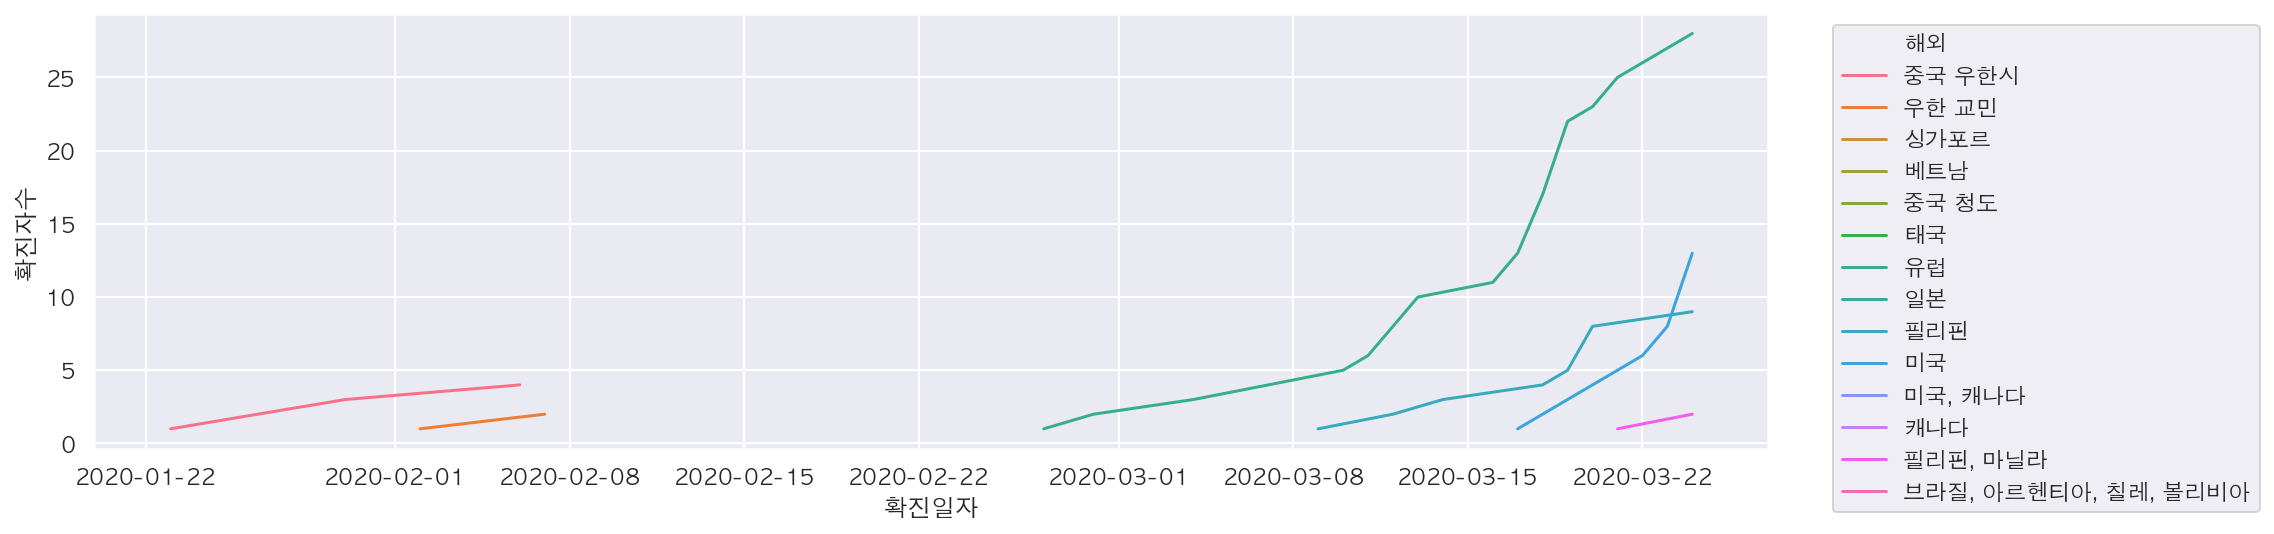

In [67]:
plt.figure(figsize=(15, 4))
g = sns.lineplot(data=day_oversea, x="확진일자",  y="확진자수", hue="해외")
g.legend(bbox_to_anchor=(1.3, 1))